# 1. Giới thiệu dự án
**Vi-rút Corona** là một họ vi rút có thể gây bệnh, có thể thay đổi từ * cảm lạnh thông thường * và * ho * đến bệnh đôi khi nặng hơn. ** Hội chứng hô hấp Trung Đông (MERS-CoV) ** và ** Hội chứng hô hấp cấp tính nặng (SARS-CoV) ** là những trường hợp nghiêm trọng mà thế giới đã phải đối mặt. <br> ** SARS-CoV-2 (n -coronavirus) ** là loại virus mới thuộc họ coronavirus, được * phát hiện lần đầu tiên * vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ ** Vũ Hán ** vào ** tháng 12 năm 2019 **. Sau đó được tuyên bố là ** Đại dịch ** bởi ** WHO ** do tỷ lệ lây lan cao trên toàn thế giới. Hiện tại (vào ngày 21 tháng 4 năm 2021), điều này dẫn đến tổng số 500.000+ Số ca tử vong trên toàn cầu. <br>

Đại dịch đang lan rộng trên toàn thế giới; nhận thức về sự lây lan này trở nên quan trọng hơn. NoteBook này là một nỗ lực để phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, tử vong và đã được phục hồi theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center>
    </font>
 <center><font face = "Verdana" size ="4"> Mạnh mẽ lên, thế giới! Hãy an toàn và khỏe mạnh. </font><center>

<br>

# Mục lục
* [2. Tải xuống và cài đặt Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Tải xuống Tập dữ liệu và tìm hiểu dữ liệu](#3.-Downloading-the-Dataset)

* [4. Phân tích toàn cầu](#4.-Global-Analysis)

    * [Bài toán 1](#Problem-1)
    * [Bài toán 2](#Problem-2)
    * [Bài toán 3](#Problem-3)
    * [Bài toán 4](#Problem-4)
    * [Bài toán 5](#Problem-5)
    * [Bài toán 6](#Problem-6)
    * [Bài toán 7](#Problem-7)

* [5. Phân tích theo lục địa](#5.-Continent-Analysis)
    * [Bài toán 8](#Problem-8)
    * [Bài toán 9](#Problem-9)
    * [Bài toán 10](#Problem-10)
    * [Bài toán 11](#Problem-11)
    * [Bài toán 12](#Problem-12)
    * [Bài toán 13](#Problem-13)

* [6. Phân tích theo quốc gia](#5.-Country-Analysis)
    * [Bài toán 14](#Problem-14)
    * [Bài toán 15](#Problem-15)
    * [Bài toán 16](#Problem-16)
    * [Bài toán 17](#Problem-17)
    
* [7. Phân tích nâng cao](#7.-Advanced-Analysis)
    * [Bài toán 18](#Problem-18)
    * [Bài toán 19](#Problem-19)
    * [Bài toán 20](#Problem-20)
    * [Bài toán 21](#Problem-21)
    * [Bài toán 22](#Problem-22)

# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:

%pip install pycountry_convert
%pip install folium
%pip install seaborn
%pip install plotly



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
deaths_df = deaths_df.loc[:,:"8/4/21"]
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

## Hãy xem dữ liệu tổng quan:

In [5]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [6]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [7]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [8]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập mã lập trình của bạn tại đây:

# Tính tổng số trường hợp mắc
total_cases = confirmed.sum(axis=0)

# Tính tổng số người chết
total_deaths = deaths.sum(axis=0)

# Tính tổng số người phục hồi
total_recovered = recoveries.sum(axis=0)

# Tính tổng số đang điều trị
total_active = total_cases - total_deaths - total_recovered

In [9]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


C:\Users\Admin\AppData\Local\Temp\ipykernel_10628\3018031447.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Admin\AppData\Local\Temp\ipykernel_10628\3018031447.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Admin\AppData\Local\Temp\ipykernel_10628\3018031447.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Admin\AppData\Local\Temp\ipykernel_10628\3018031447.py:5: FutureWarning:

Series.__getit

## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

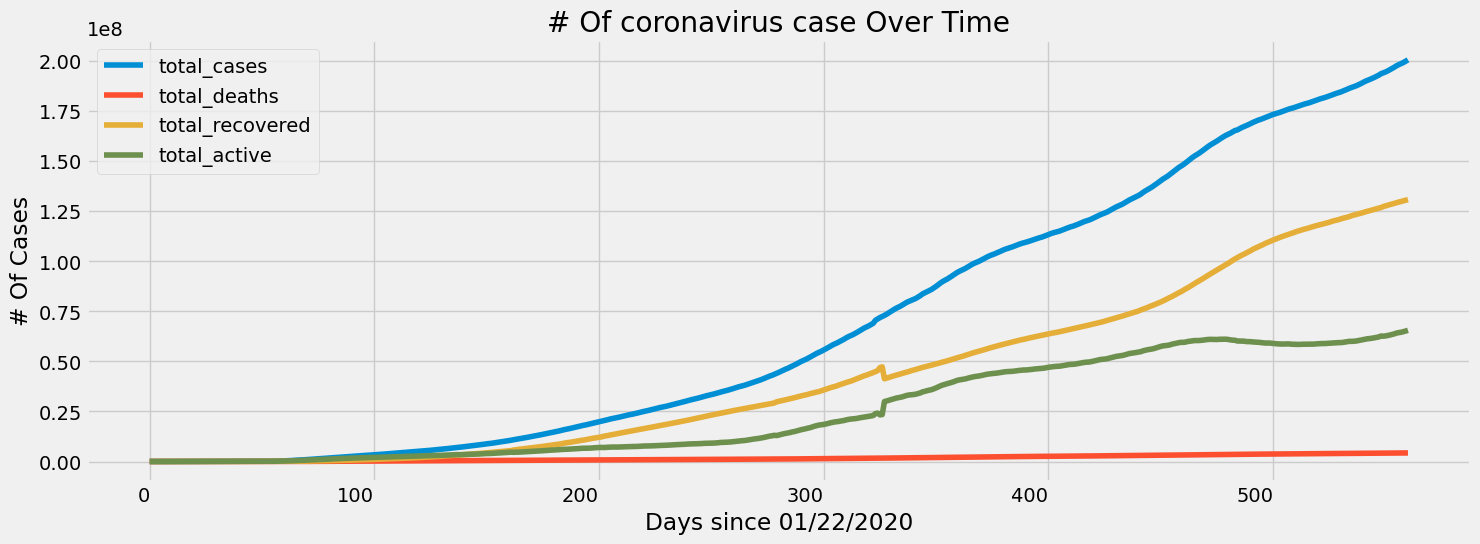

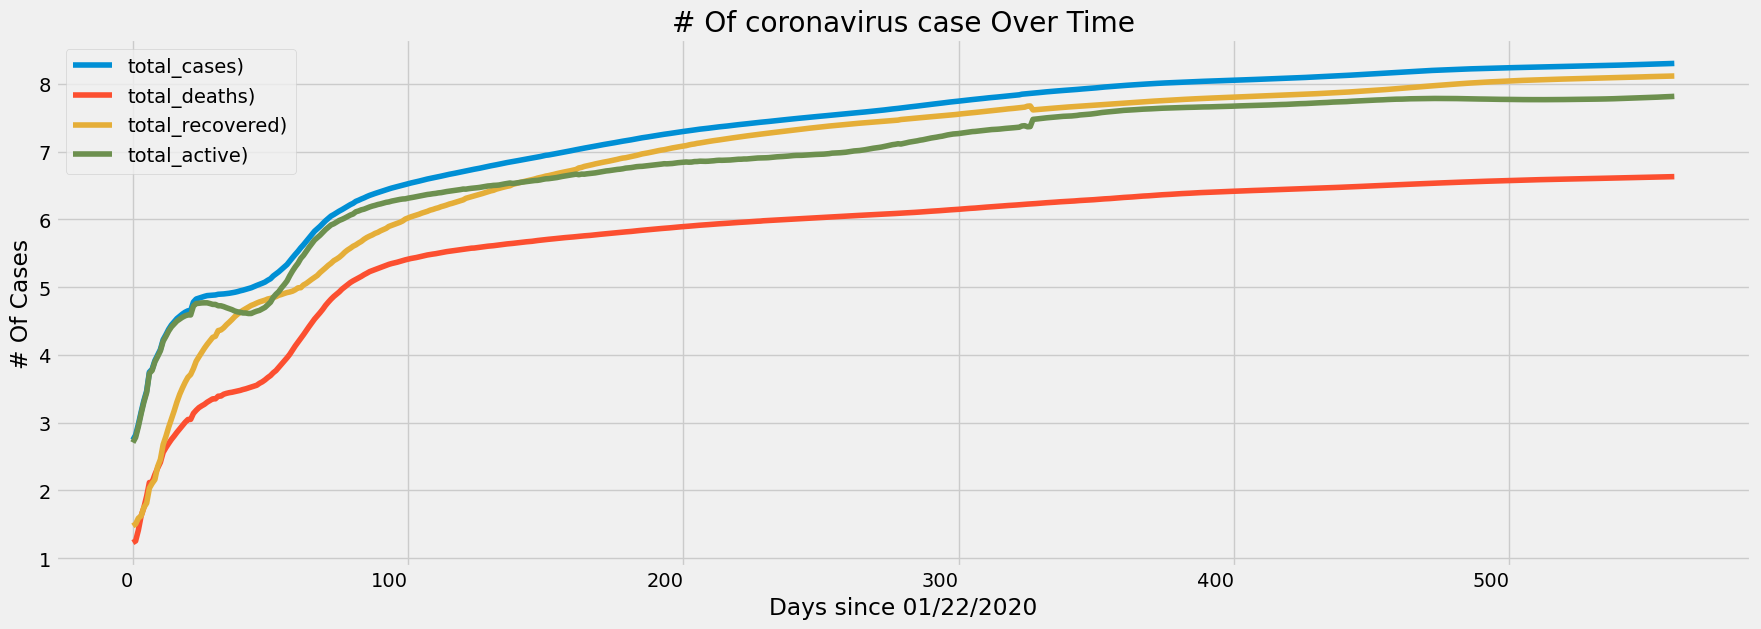

In [10]:
# Tính log(10) của các biến
log_total_cases = np.log10(total_cases)
log_total_deaths = np.log10(total_deaths)
log_total_recovered = np.log10(total_recovered)
log_total_active = np.log10(total_active)

# Biểu đồ cho số lượng
plt.figure(figsize=(35, 12))
plt.subplot(2, 2, 1)
plt.plot(dates, total_cases, label='total_cases')
plt.plot(dates, total_deaths, label='total_deaths')
plt.plot(dates, total_recovered, label='total_recovered')
plt.plot(dates, total_active, label='total_active')
plt.title('# Of coronavirus case Over Time')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 100), labels=np.arange(0, 600, 100), ha='right')
plt.legend()
plt.grid(True)

# Biểu đồ cho log(10)
plt.figure(figsize=(35, 12))
plt.subplot(2, 2, 2)
plt.plot(dates, log_total_cases, label='total_cases)')
plt.plot(dates, log_total_deaths, label='total_deaths)')
plt.plot(dates, log_total_recovered, label='total_recovered)')
plt.plot(dates, log_total_active, label='total_active)')
plt.title('# Of coronavirus case Over Time')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 100), labels=np.arange(0, 600, 100), ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

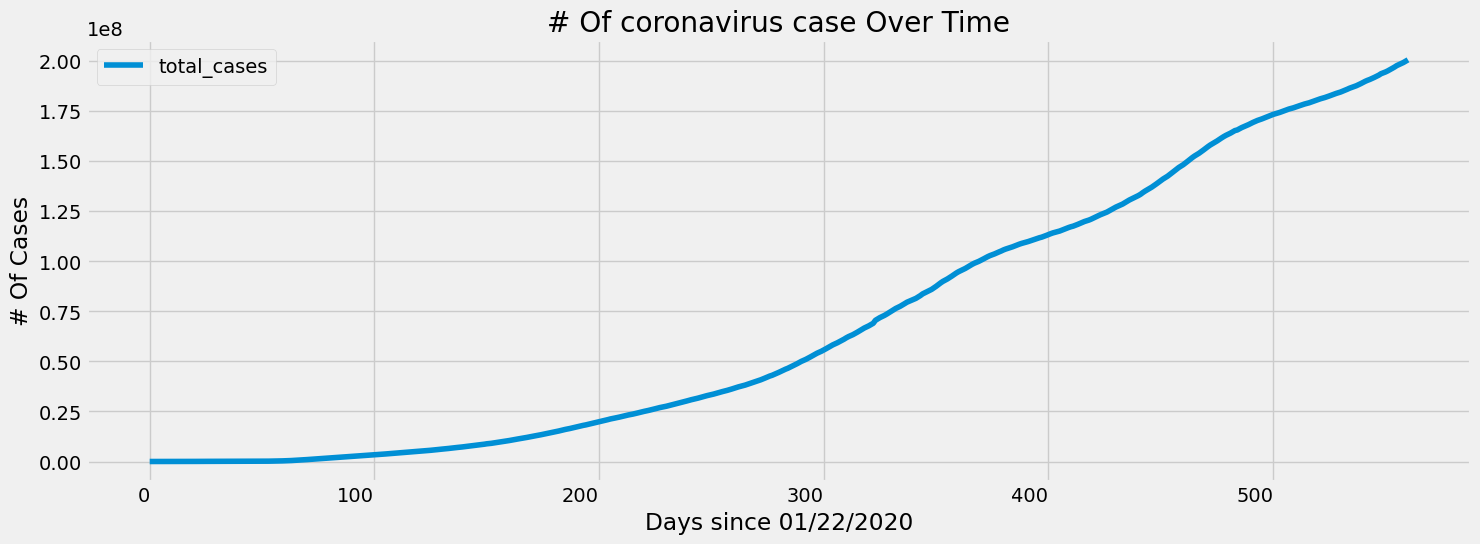

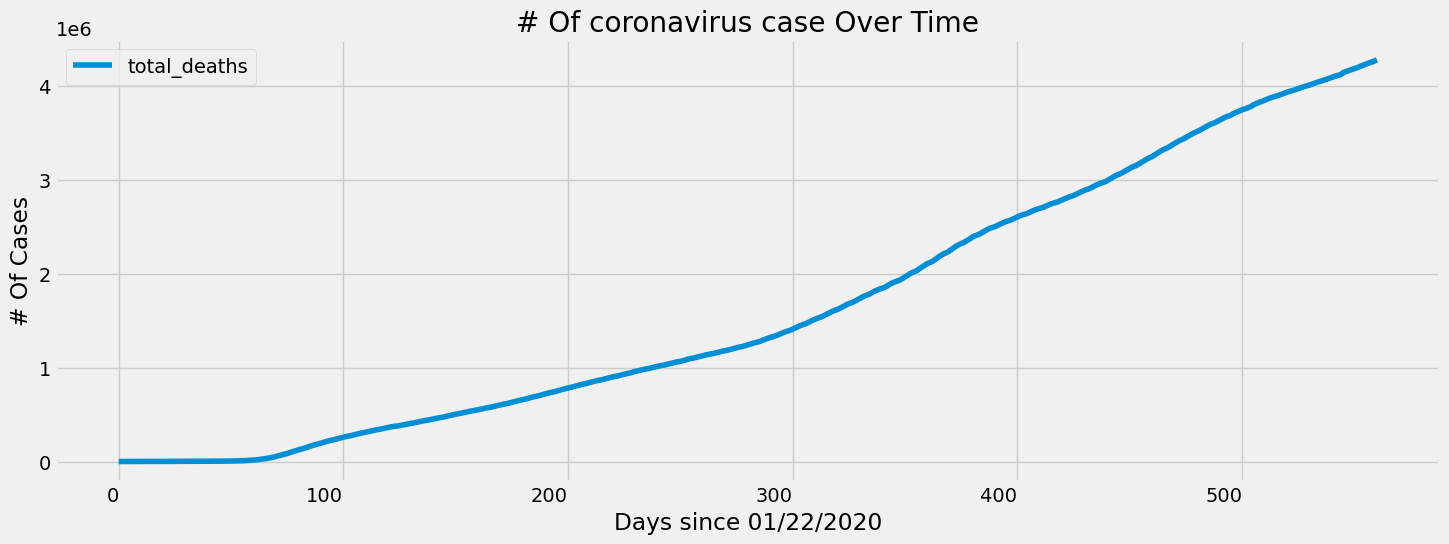

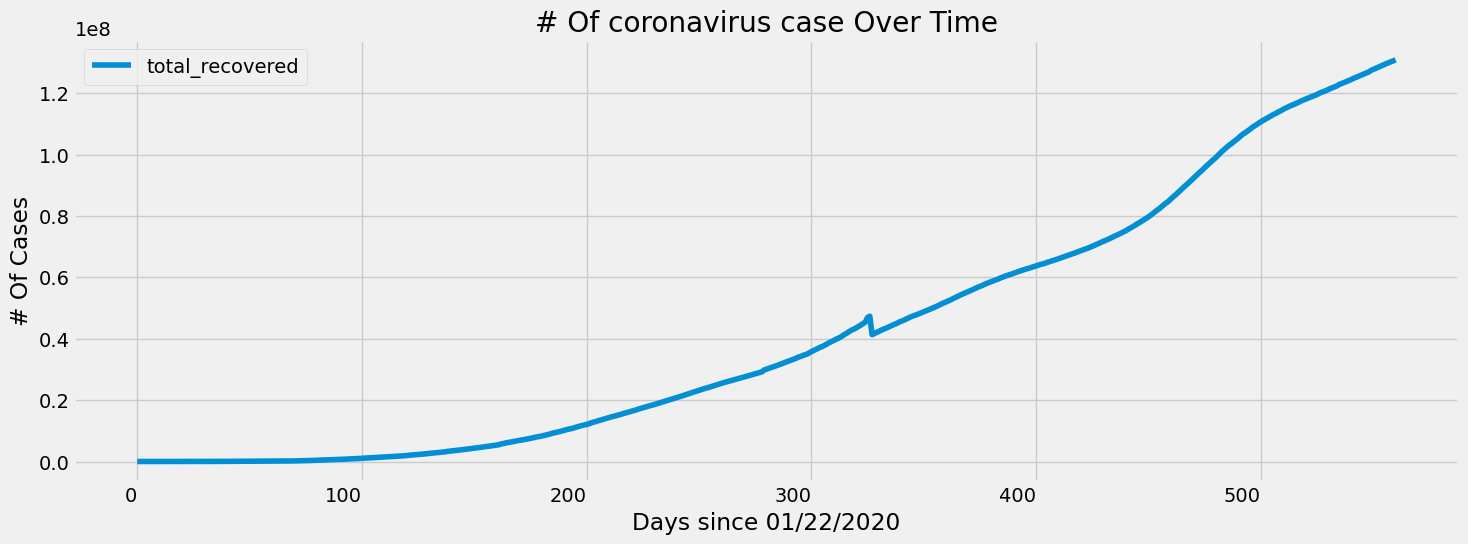

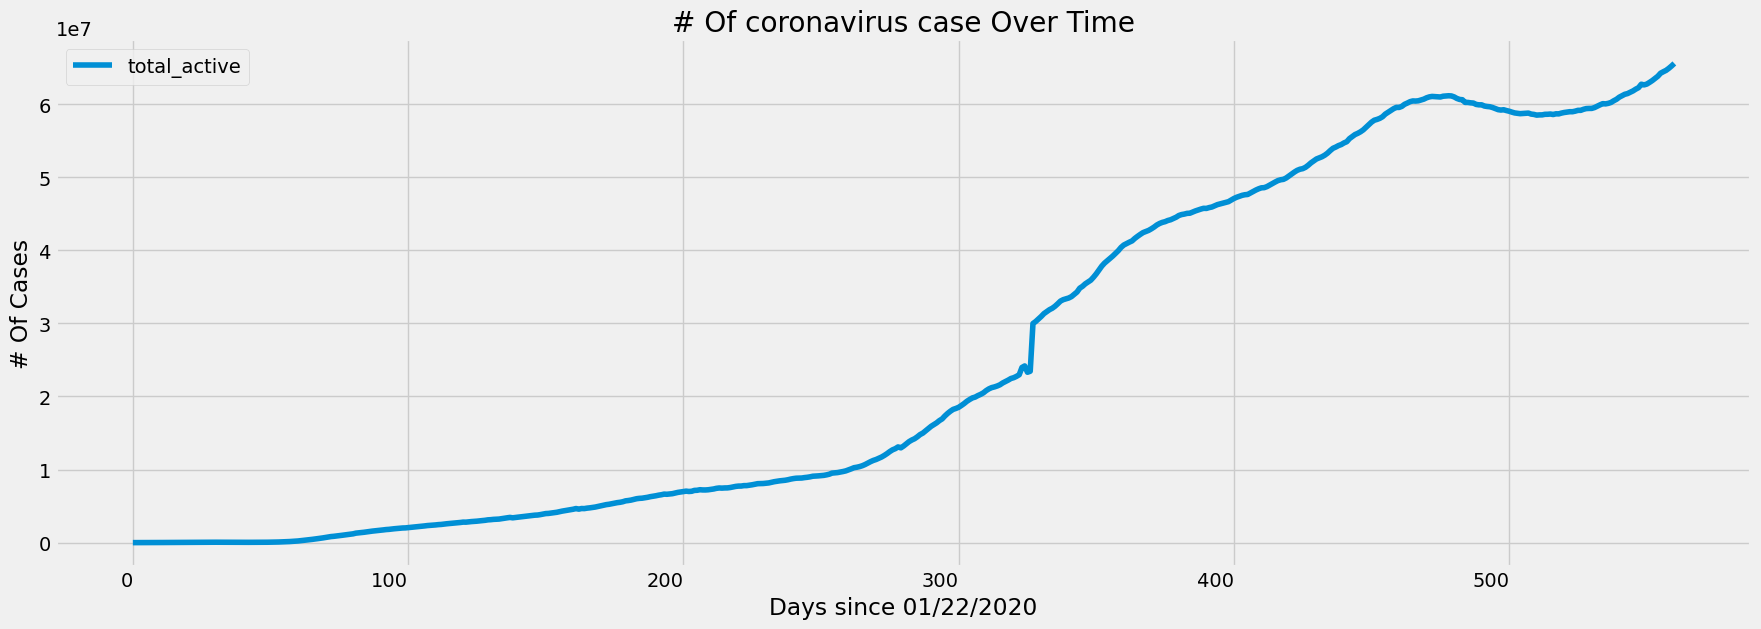

In [11]:
# Biểu đồ cho tổng số ca bệnh
plt.figure(figsize=(35, 12))
plt.subplot(2, 2, 1)
plt.plot(dates, total_cases, label='total_cases')
plt.title('# Of coronavirus case Over Time')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 100), labels=np.arange(0, 600, 100), ha='right')
plt.legend()
plt.grid(True)

# Biểu đồ cho tổng số người chết
plt.figure(figsize=(35, 12))
plt.subplot(2, 2, 2)
plt.plot(dates, total_deaths, label='total_deaths')
plt.title('# Of coronavirus case Over Time')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 100), labels=np.arange(0, 600, 100), ha='right')
plt.legend()
plt.grid(True)

# Biểu đồ cho tổng số người phục hồi
plt.figure(figsize=(35, 12))
plt.subplot(2, 2, 3)
plt.plot(dates, total_recovered, label='total_recovered')
plt.title('# Of coronavirus case Over Time')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 100), labels=np.arange(0, 600, 100), ha='right')
plt.legend()
plt.grid(True)

# Biểu đồ cho tổng số đang điều trị
plt.figure(figsize=(35, 12))
plt.subplot(2, 2, 4)
plt.plot(dates, total_active, label='total_active')
plt.title('# Of coronavirus case Over Time')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 100), labels=np.arange(0, 600, 100), ha='right')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [12]:
# Tính toán số lượng gia tăng hàng ngày
daily_increase_cases = np.diff(total_cases, prepend=0)
daily_increase_deaths = np.diff(total_deaths, prepend=0)
daily_increase_recovered = np.diff(total_recovered, prepend=0)
daily_increase_active = np.diff(total_active, prepend=0)

# In kết quả hoặc sử dụng các giá trị trong phần tiếp theo của mã của bạn
print("Daily Increase in Total Cases:", daily_increase_cases)
print("Daily Increase in Total Deaths:", daily_increase_deaths)
print("Daily Increase in Total Recovered:", daily_increase_recovered)
print("Daily Increase in Total Active:", daily_increase_active)


Daily Increase in Total Cases: [    557     100     287     493     683     809    2651     589    2068
    1690    2111    4749    3100    4012    3745    3162    3594    2731
    3031    2609    2043     418   15152    6528    2143    2183    2035
    1882     500     561     630    1762     382     568     854     972
    1344    1424    1871    2379    1980    2612    2344    2740    3984
    4137    3798    4295    4759    7476    6756   13194   10888   11233
   14567   15174   17561   27087   29530   32427   34212   42555   41883
   51481   60814   63931   69582   56516   65011   78442   86357   82448
   84210   60121   71715   74726   68938   82176   87181   86422   75515
  118581   71832   84633   78256   94468   87880   78252   76322   76482
   76087   82038   82717   83563   83205   70795   70984   75832   77328
   83652   88946   78262   73997   77637   79685   90422   89138   90483
   84343   75223   76141   85280   84348   95642   95902   93890   78363
   89132   95818  10

## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

<Figure size 640x480 with 0 Axes>

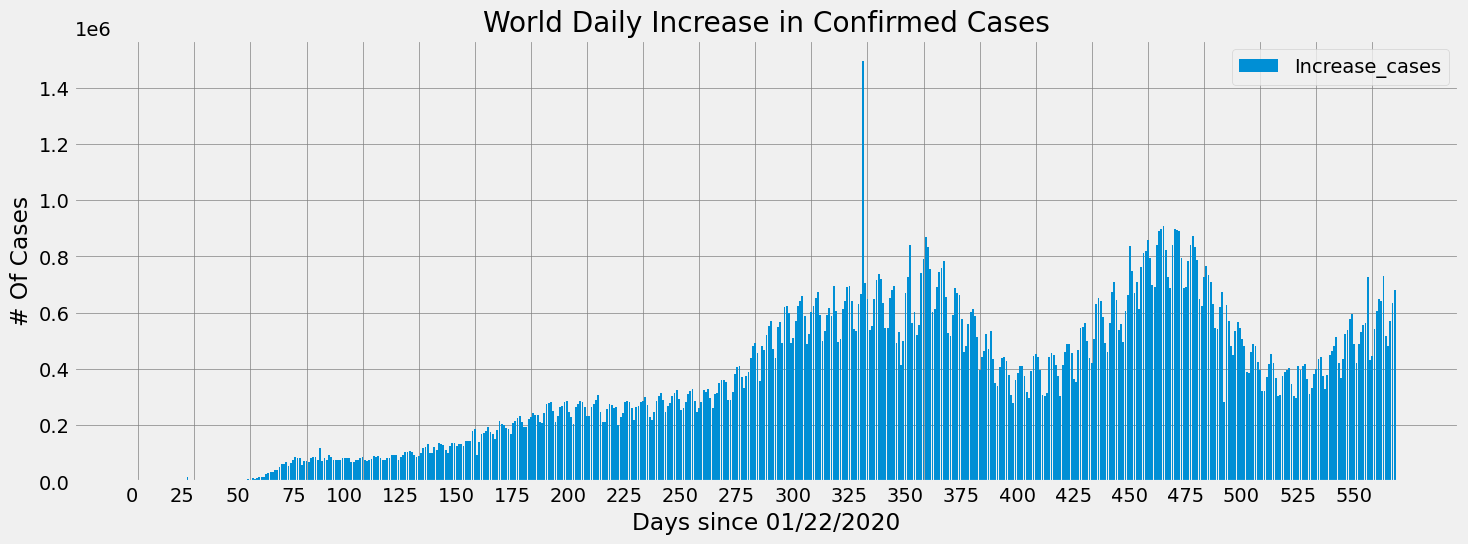

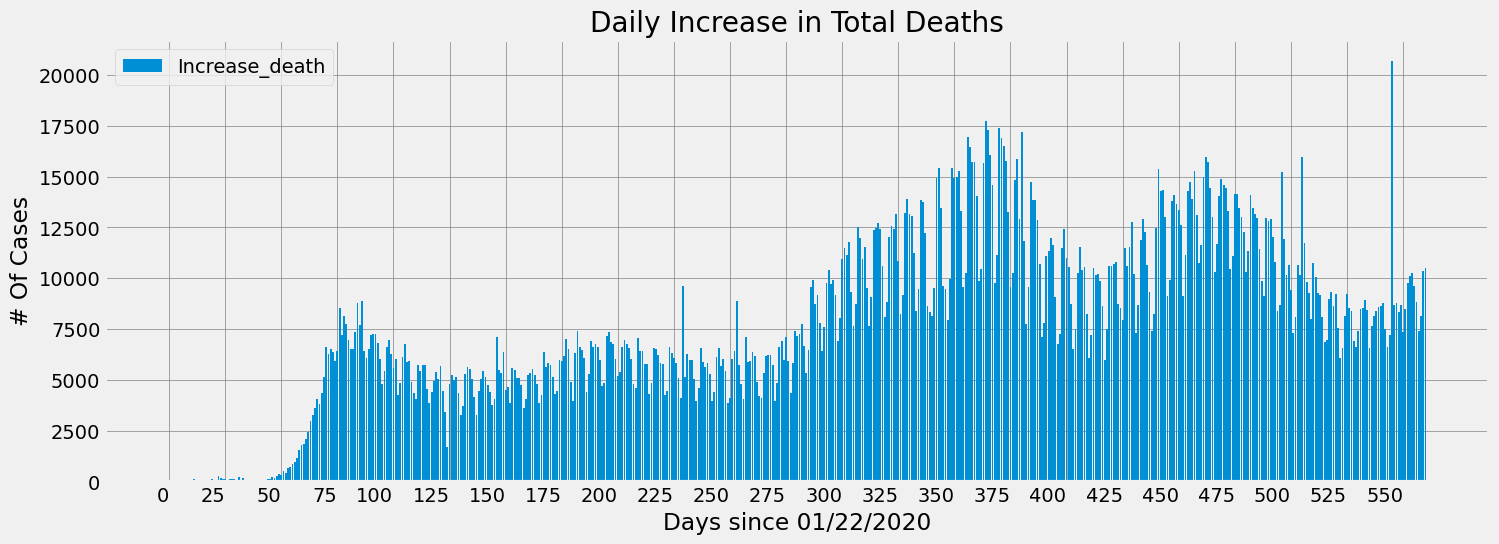

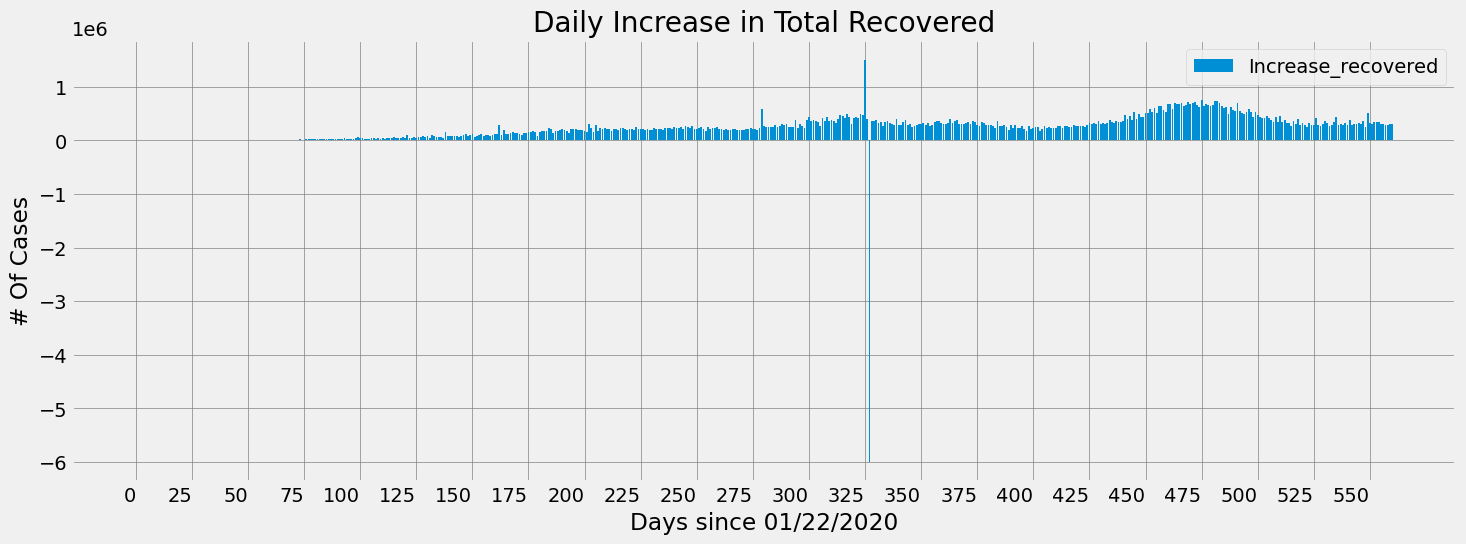

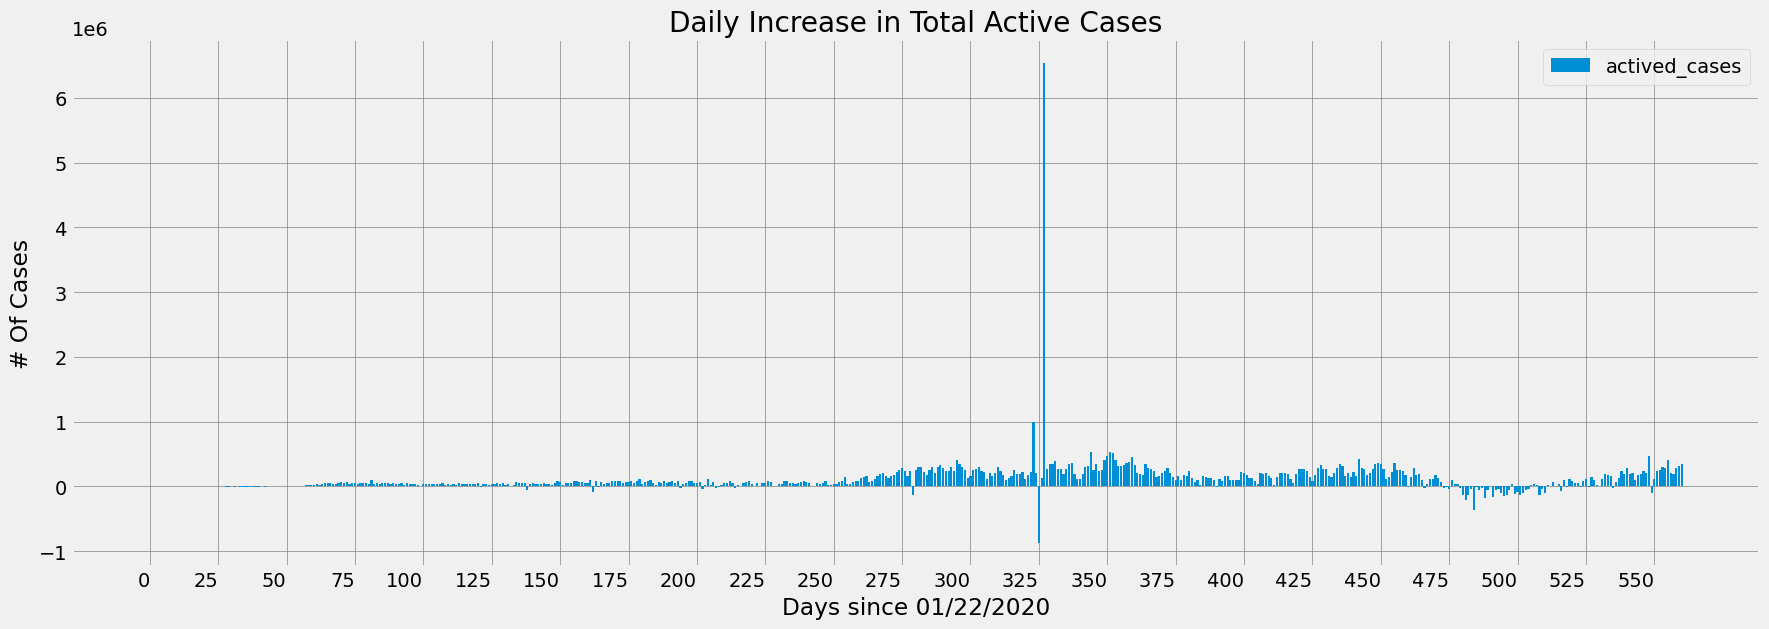

In [13]:
plt.suptitle('World Daily Increases in Confirmed Recovereds')

# Biểu đồ cho số lượng gia tăng hàng ngày của tổng số ca bệnh
plt.figure(figsize=(35, 12))
plt.subplot(2, 2, 1)
plt.bar(np.arange(len(dates)), daily_increase_cases, label='Increase_cases')
plt.title('World Daily Increase in Confirmed Cases')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 25), labels=np.arange(0, 551, 25), ha='right')
plt.grid(axis='both', linewidth=0.5, color='gray')
plt.legend()

# Biểu đồ cho số lượng gia tăng hàng ngày của tổng số người chết
plt.figure(figsize=(35, 12))
plt.subplot(2, 2, 2)
plt.bar(np.arange(len(dates)), daily_increase_deaths, label='Increase_death')
plt.title('Daily Increase in Total Deaths')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 25), labels=np.arange(0, 551, 25), ha='right')
plt.grid(axis='both', linewidth=0.5, color='gray')
plt.legend()

# Biểu đồ cho số lượng gia tăng hàng ngày của tổng số người phục hồi
plt.figure(figsize=(35, 12))
plt.subplot(2, 2, 3)
plt.bar(np.arange(len(dates)), daily_increase_recovered, label='Increase_recovered')
plt.title('Daily Increase in Total Recovered')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 25), labels=np.arange(0, 551, 25), ha='right')
plt.grid(axis='both', linewidth=0.5, color='gray')
plt.legend()

# Biểu đồ cho số lượng gia tăng hàng ngày của tổng số đang điều trị
plt.figure(figsize=(35, 12))
plt.subplot(2, 2, 4)
plt.bar(np.arange(len(dates)), daily_increase_active, label='actived_cases')
plt.title('Daily Increase in Total Active Cases')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 25), labels=np.arange(0, 551, 25), ha='right')
plt.grid(axis='both', linewidth=0.5, color='gray')
plt.legend()

plt.tight_layout()
plt.show()


# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [14]:
# Tính toán số lượng ca mắc hàng ngày
daily_confirmed = np.diff(total_cases, prepend=0)

# Tính toán tỷ lệ tử vong và tỷ lệ hồi phục theo phần trăm
mortality_rate = round((total_deaths / total_cases) * 100, 2)
print('Mortality rate: ')
print(mortality_rate)
recovery_rate = round((total_recovered / total_cases) * 100, 2)
print('Recovery rate: ') 
print(recovery_rate)

Mortality rate: 
1/22/20    3.05
1/23/20    2.74
1/24/20    2.75
1/25/20    2.92
1/26/20    2.64
           ... 
7/31/21    2.14
8/1/21     2.14
8/2/21     2.14
8/3/21     2.14
8/4/21     2.13
Length: 561, dtype: float64
Recovery rate: 
1/22/20     5.39
1/23/20     4.87
1/24/20     4.13
1/25/20     2.92
1/26/20     2.64
           ...  
7/31/21    65.38
8/1/21     65.37
8/2/21     65.32
8/3/21     65.27
8/4/21     65.20
Length: 561, dtype: float64


# Bài toán 7
**7.1**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

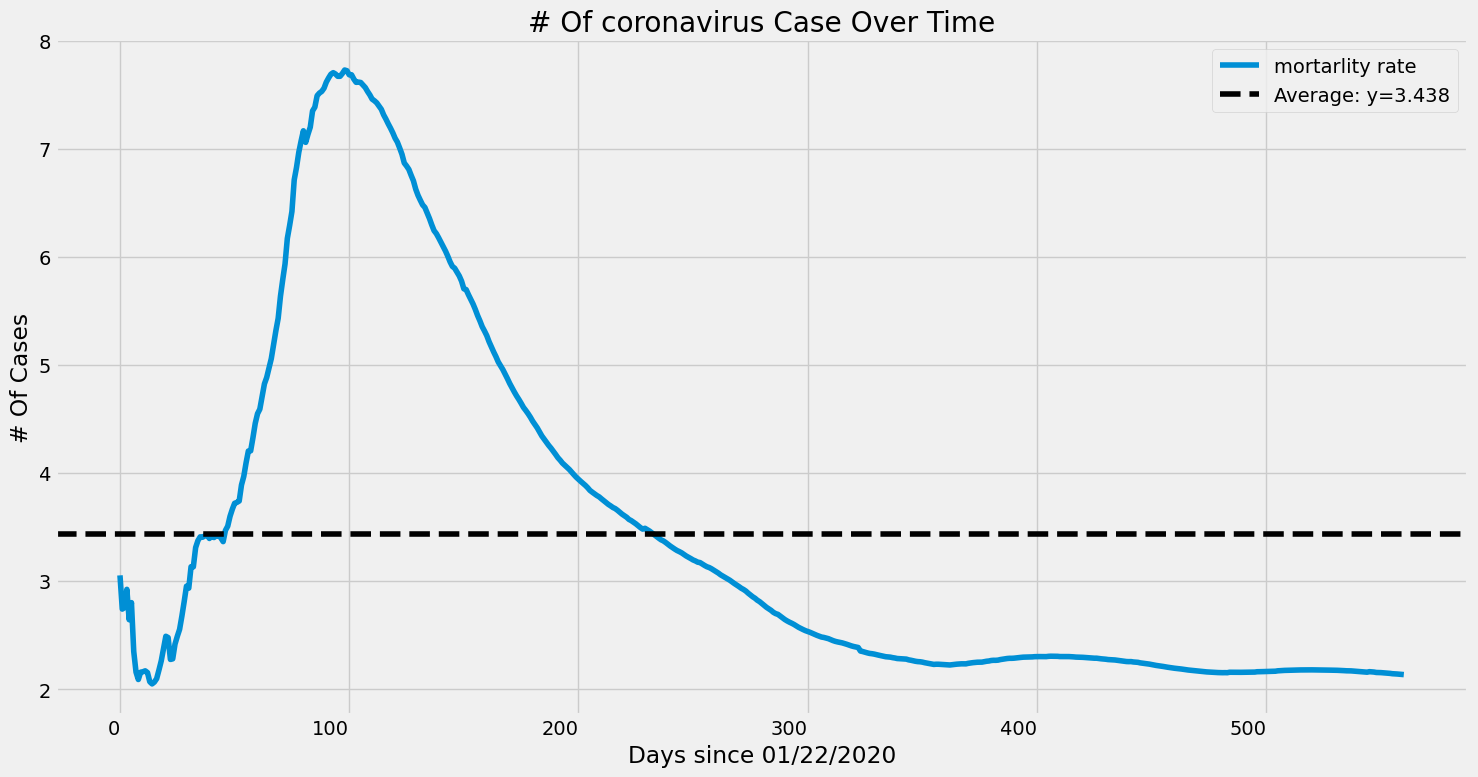

In [15]:
# Tính toán tỷ lệ tử vong theo thời gian
mortality_rate = (total_deaths / total_cases) * 100

# Tính toán tỷ lệ tử vong trung bình mọi lúc
average_mortality_rate = np.mean(mortality_rate)

# Biểu đồ cho tỷ lệ tử vong theo thời gian
plt.figure(figsize=(15, 8))
plt.plot(dates, mortality_rate, label='mortarlity rate')

# Đường gạch ngang cho tỷ lệ tử vong trung bình
plt.axhline(y=average_mortality_rate, color='black', linestyle='--', label=f'Average: y=3.438')

plt.title('# Of coronavirus Case Over Time')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 100), labels=np.arange(0, 600, 100), ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**7.2**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

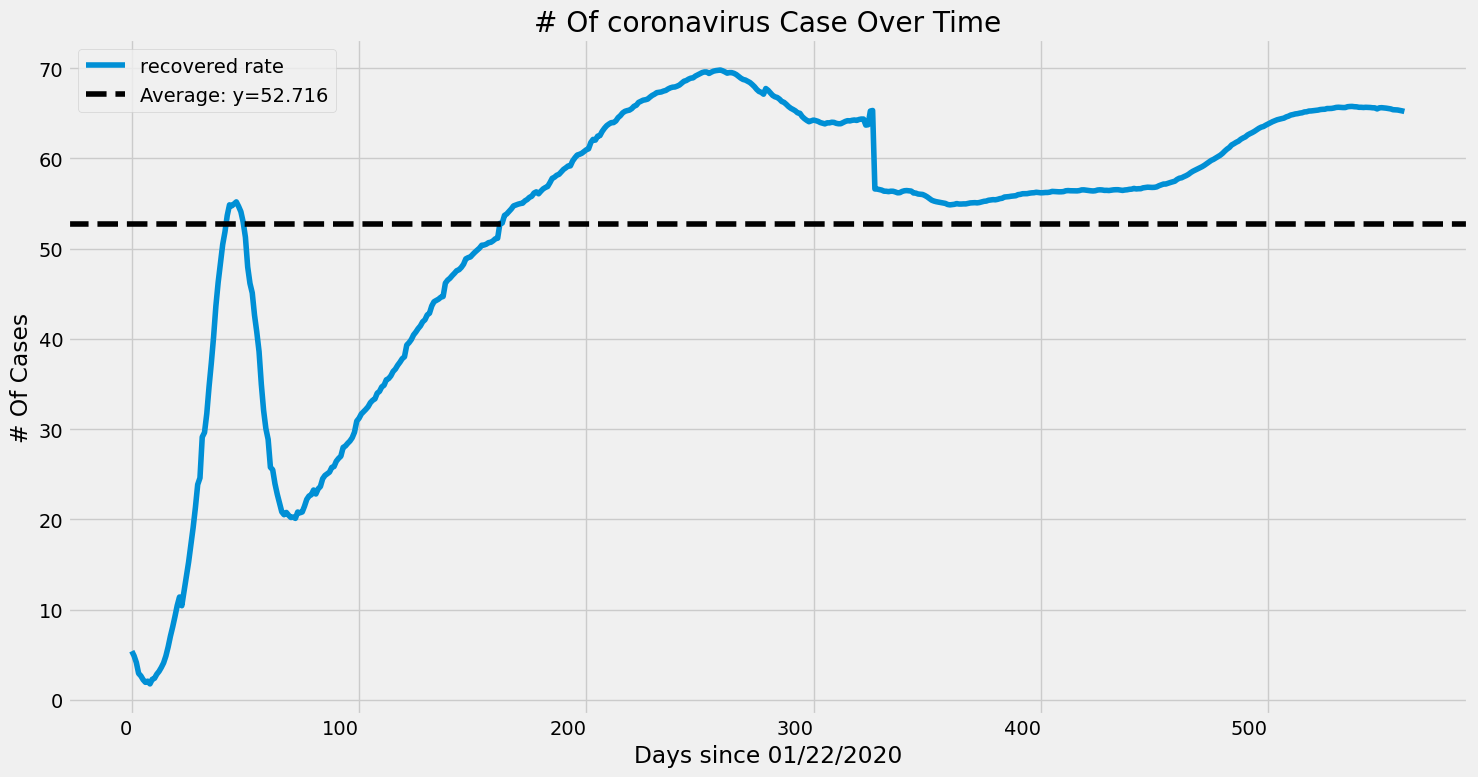

In [16]:
# Tính toán tỷ lệ tử vong theo thời gian
recovered_rate = (total_recovered / total_cases) * 100

# Tính toán tỷ lệ tử vong trung bình mọi lúc
average_recovered_rate = np.mean(recovered_rate)

# Biểu đồ cho tỷ lệ tử vong theo thời gian
plt.figure(figsize=(15, 8))
plt.plot(dates, recovered_rate, label='recovered rate')

# Đường gạch ngang cho tỷ lệ tử vong trung bình
plt.axhline(y=average_recovered_rate, color='black', linestyle='--', label=f'Average: y=52.716')

plt.title('# Of coronavirus Case Over Time')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('# Of Cases')
plt.xticks(np.arange(0, len(dates), 100), labels=np.arange(0, 600, 100), ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [17]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [18]:
# Thêm cột "continent" vào DataFrame
def add_continent_column(df):
    # Thêm cột mới "continent" với giá trị là châu lục tương ứng
    df['continent'] = df['Country/Region'].apply(lambda x: continents[country_to_continent_code(x)])

    # Di chuyển cột "continent" đến vị trí mong muốn (sau cột "Country/Region" và trước cột "Lat")
    columns = df.columns.tolist()
    columns = columns[:2] + ['continent'] + columns[2:-1]
    df = df[columns]

    return df

# Thêm cột "continent" vào các DataFrame
confirmed_df = add_continent_column(confirmed_df)
deaths_df = add_continent_column(deaths_df)
recoveries_df = add_continent_column(recoveries_df)

confirmed_df.head()  # Để kiểm tra kết quả cho DataFrame confirmed_df


Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 566 columns]

# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Deaths: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [19]:
confirmed_cols = confirmed_df.columns[-1:]
total_cases_by_country = confirmed_df.groupby(['Country/Region', 'continent'])[confirmed_cols].sum()

deaths_cols = deaths_df.columns[-1:]
total_deaths_by_country = deaths_df.groupby(['Country/Region', 'continent'])[deaths_cols].sum()

recoveries_cols = recoveries_df.columns[-1:]
total_recovered_by_country = recoveries_df.groupby(['Country/Region', 'continent'])[recoveries_cols].sum()

total_active_by_country = total_cases_by_country - total_deaths_by_country - total_recovered_by_country

mortality_rate_by_country = (total_deaths_by_country / total_cases_by_country * 100).round(2)

country_df = pd.DataFrame(index=total_cases_by_country.index)
country_df['Confirmed'] = total_cases_by_country.squeeze()
country_df['Deaths'] = total_deaths_by_country.squeeze()
country_df['Recoveries'] = total_recovered_by_country.squeeze()
country_df['Active'] = total_active_by_country.squeeze()
country_df['Mortality Rate'] = mortality_rate_by_country.squeeze()

country_df.reset_index(inplace=True)  

country_df.head()


Country/Region continent  Confirmed  Deaths  Recoveries  Active  \
0    Afghanistan      Asia     148933    6836       82586   59511   
1        Albania    Europe     133310    2457      130314     539   
2        Algeria    Africa     176724    4404      118409   53911   
3        Andorra    Europe      14797     128       14380     289   
4         Angola    Africa      43158    1026       39582    2550   

   Mortality Rate  
0            4.59  
1            1.84  
2            2.49  
3            0.87  
4            2.38

# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [20]:
# Tính tổng các giá trị theo lục địa
continental_df = country_df.groupby('continent').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recoveries': 'sum',
    'Active': 'sum',
})

# Tính tỷ lệ tử vong và làm tròn đến 2 chữ số thập phân
continental_df['Mortality Rate'] = (continental_df['Deaths'] / continental_df['Confirmed'] * 100).round(2)

# Hiển thị DataFrame
continental_df.reset_index(inplace=True)
continental_df


continent  Confirmed   Deaths  Recoveries    Active  Mortality Rate
0         Africa    6855602   174000     5955131    726471            2.54
1           Asia   62536726   902952    57853343   3780431            1.44
2      Australia      90000     1425       55290     33285            1.58
3         Europe   52448545  1167140    27947075  23334330            2.23
4  North America   42351963   924518     5776939  35650506            2.18
5         Others     753558    16614      654615     82329            2.20
6  South America   35722194  1096367    32656668   1969159            3.07

## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [21]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()



# Bài toán 11
**11.1**

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

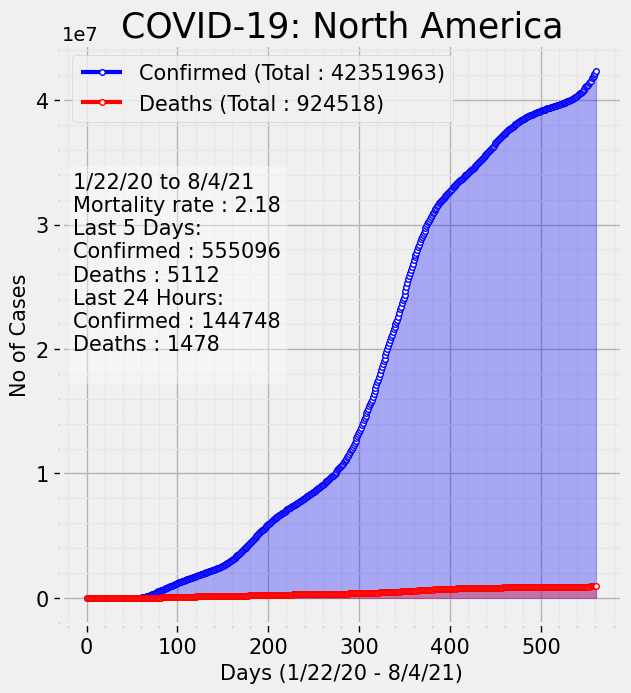

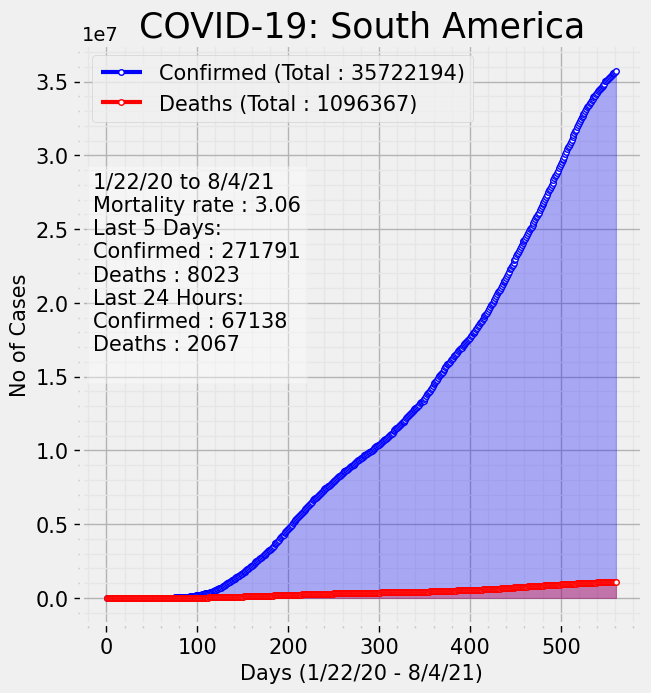

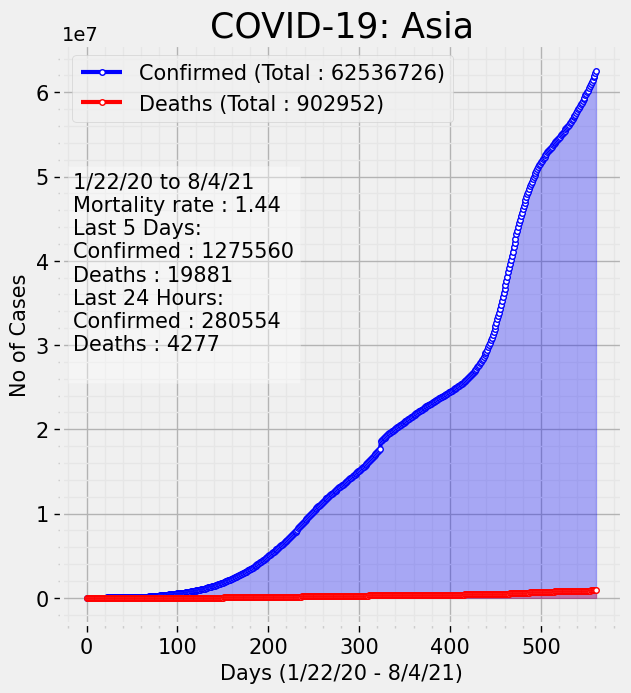

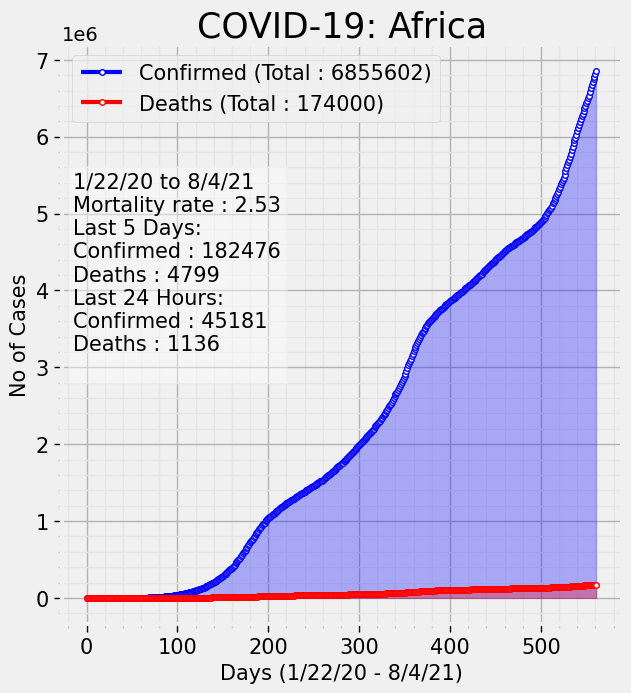

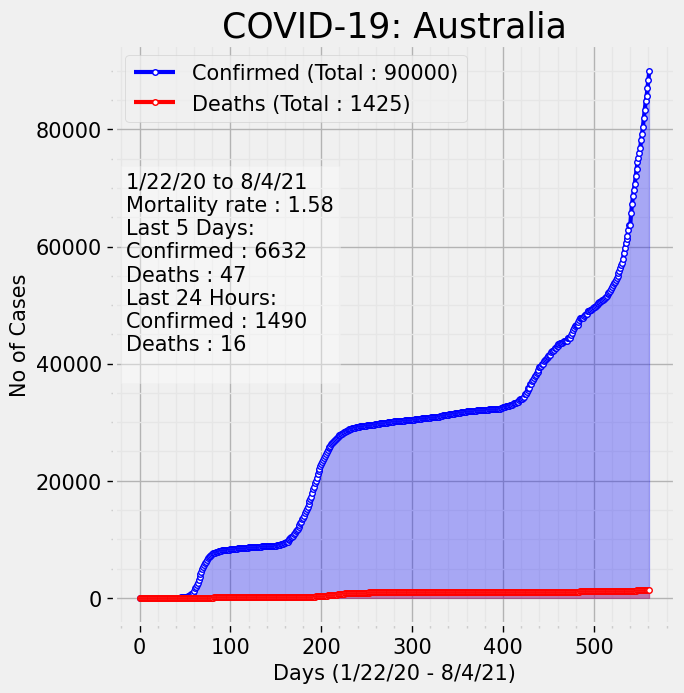

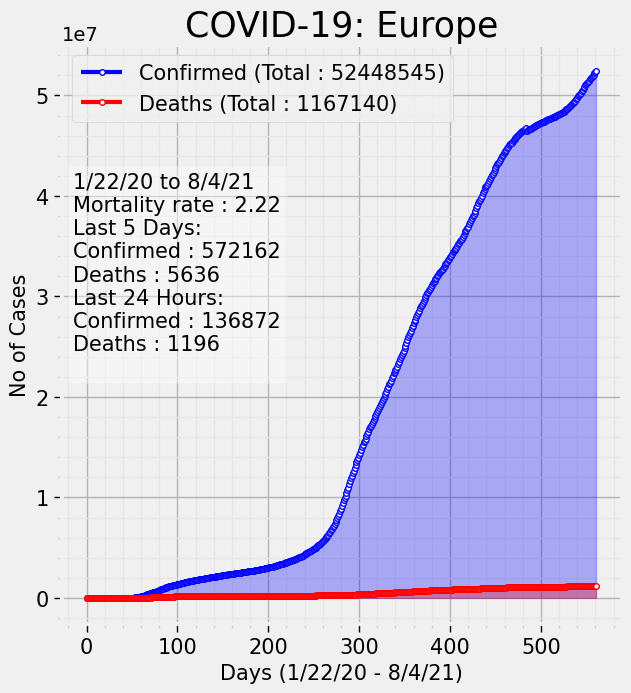

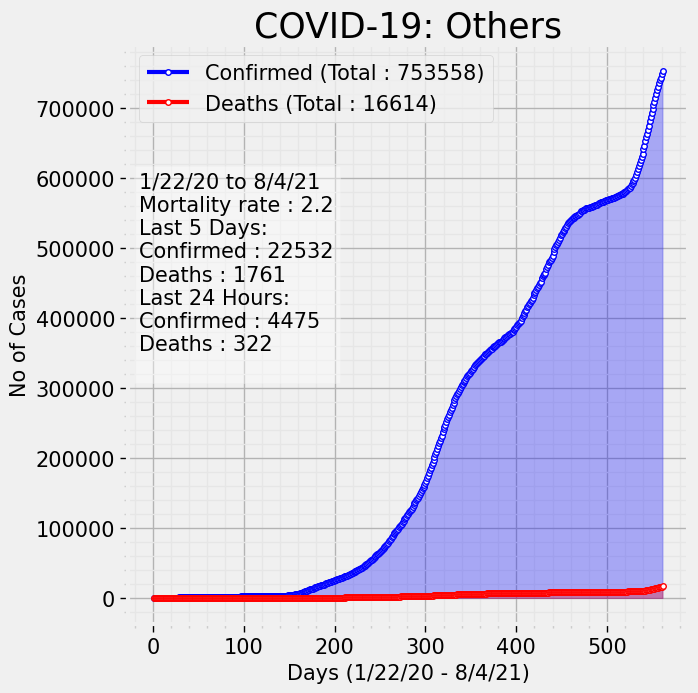

In [22]:
# Danh sách các lục địa, bạn có thể điều chỉnh theo thứ tự mong muốn
continents = ["North America", "South America", "Asia", "Africa", "Australia", "Europe", "Others"]

# Lặp qua từng lục địa và vẽ biểu đồ
for continent in continents:
    visualize_covid_cases(confirmed_df, deaths_df, continent=continent)

# Hiển thị biểu đồ
plt.show()



**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

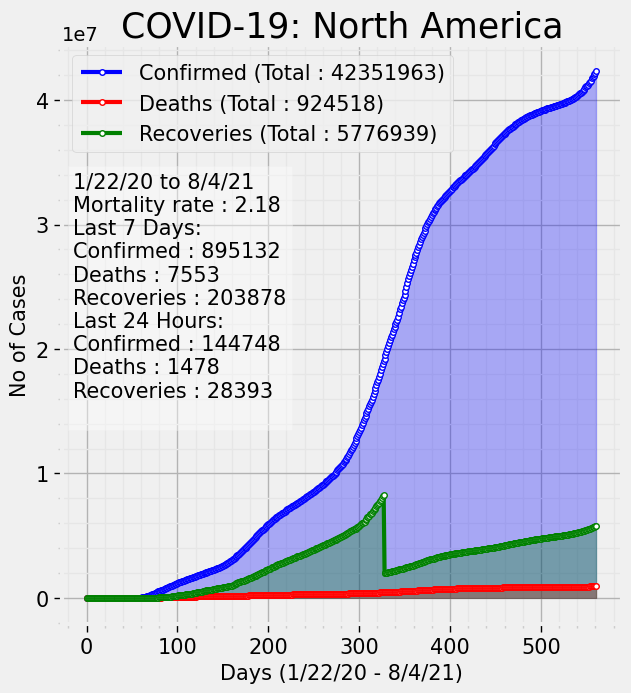

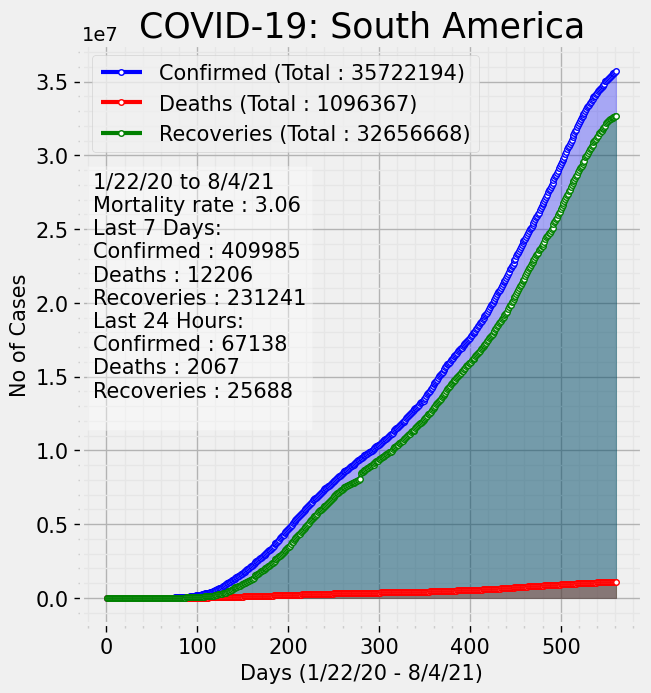

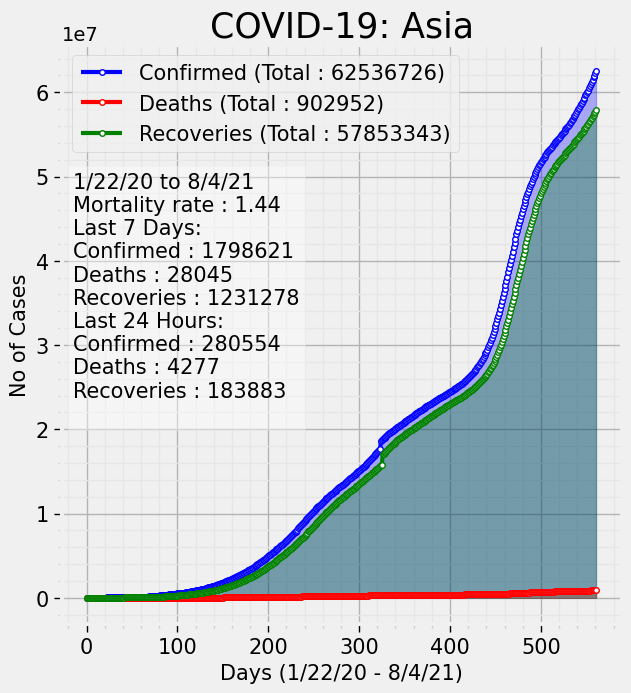

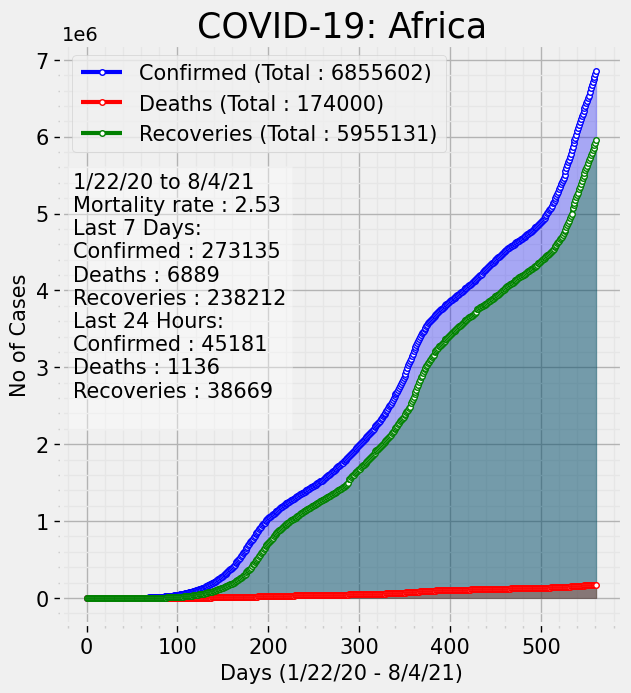

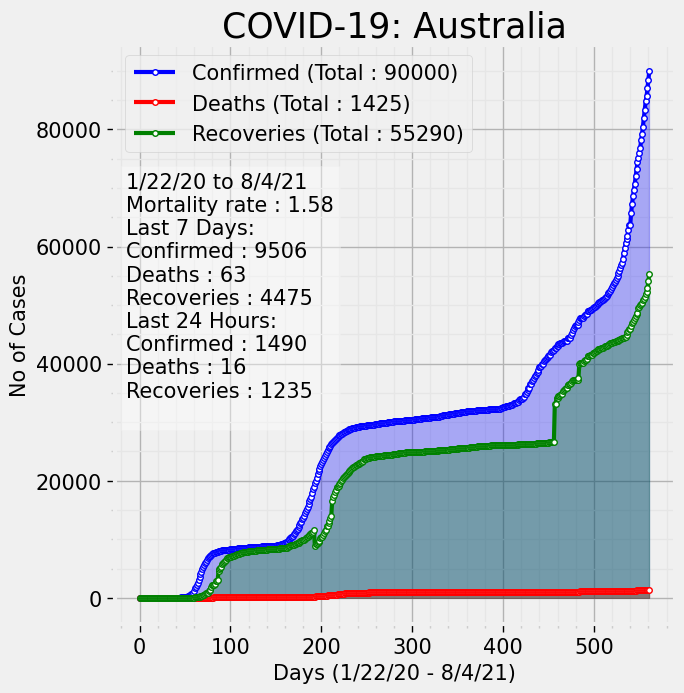

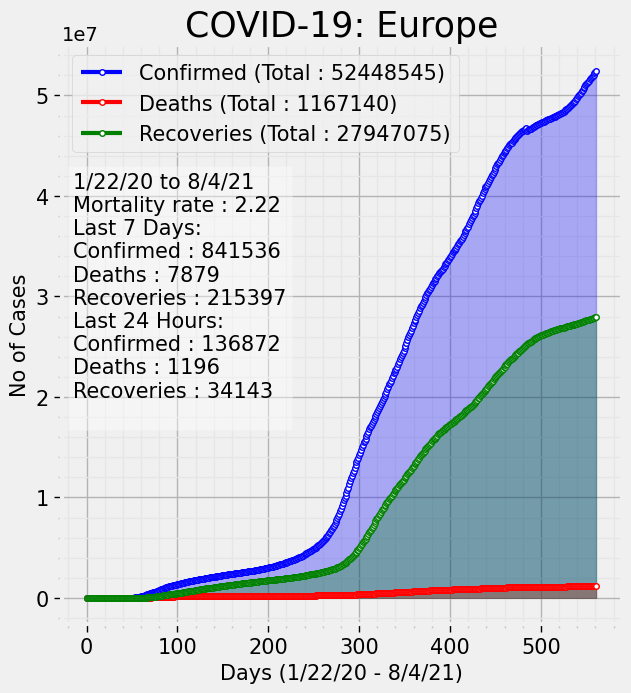

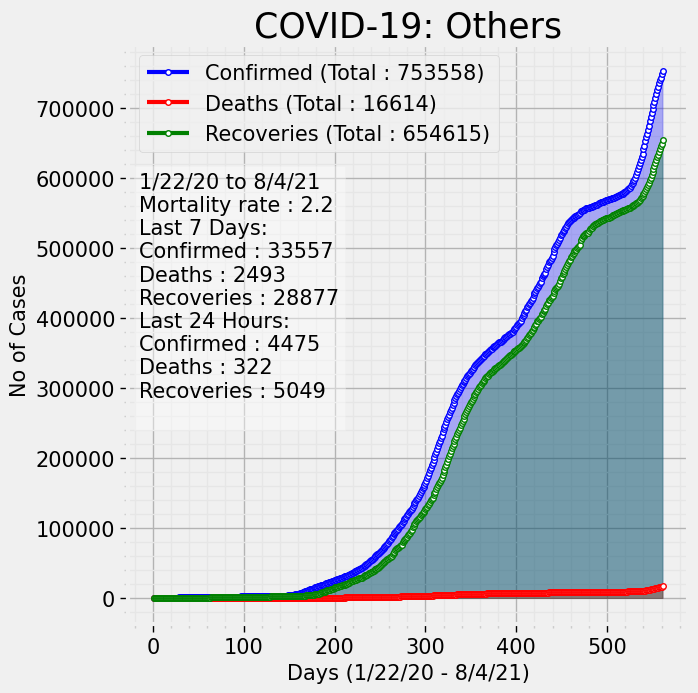

In [23]:
def visualize_covid_cases_7(confirmed, deaths, recoveries,
                          continent=None, country=None, state=None, period=None, figure=None,
                          scale="linear"):
    x = 0
    if figure is None:
        f = plt.figure(figsize=(10, 10))
        # Sub plot
        ax = f.add_subplot(111)
    else:
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1], figure[2], figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent is not None:
        params = ["continent", continent]
    elif country is not None:
        params = ["country", country]
    else:
        params = ["All", "All"]
    color = ["blue", "red", "green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o', markersize=4, markerfacecolor='#ffffff')
    for i, stat in enumerate(stats):
        if params[1] == "All":
            cases = np.sum(np.asarray(stat.iloc[:, 5:]), axis=0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:, 5:]), axis=0)[x:]
        date = np.arange(1, cases.shape[0] + 1)[x:]
        plt.plot(date, cases, label=label[i] + " (Total : " + str(cases[-1]) + ")", color=color[i], **marker_style)
        plt.fill_between(date, cases, color=color[i], alpha=0.3)
    if params[1] == "All":
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:, 5:]), axis=0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:, 5:]), axis=0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:, 5:]), axis=0)[x:]
    else:
        Total_confirmed = np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:, 5:]), axis=0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:, 5:]), axis=0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:, 5:]), axis=0)[x:]

    text = stats[0].columns[5] + " to " + stats[0].columns[-1] + "\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"  # Change from "Last 5 Days" to "Last 7 Days"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8]) + "\n"  # Change from [-6] to [-8]
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8]) + "\n"  # Change from [-6] to [-8]
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8]) + "\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2]) + "\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2]) + "\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2]) + "\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top',
             transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days (" + confirmed_df.columns[5] + " - " + confirmed_df.columns[-1] + ")", "No of Cases"]

    # Plot Parameters
    plot_params(ax, axis_label, scale=scale)

    # Plot Title
    if params[1] == "All":
        plt.title("COVID-19 Cases World", {'fontsize': 25})
    else:
        plt.title("COVID-19: " + params[1], {'fontsize': 25})

    # Legend Location
    l = plt.legend(loc="best", fontsize=15)

    if figure is None:
        plt.show()

# Sử dụng hàm visualize_covid_cases cho mỗi lục địa
continents = ["North America", "South America", "Asia", "Africa", "Australia", "Europe", "Others"]
for continent in continents:
    visualize_covid_cases_7(confirmed_df, deaths_df, recoveries_df, continent=continent)


# Bài toán 12
    Trực quan hóa ma trận tương quan của continents_df.

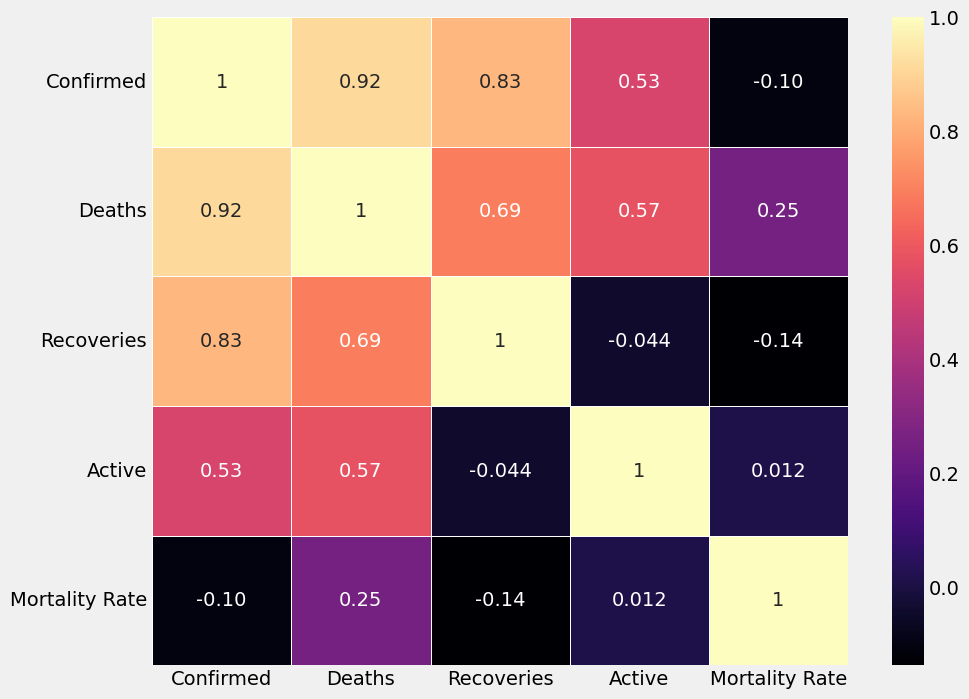

In [24]:
# Loại bỏ các cột không phải dữ liệu số
numeric_df = continental_df.select_dtypes(include=[float, int])

# Tạo ma trận tương quan
correlation_matrix = numeric_df.corr()

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 8))

# Định dạng số tùy chỉnh
def custom_fmt(x, pos):
    if x == int(x):
        return f'{int(x)}'
    elif abs(x) < 0.1:
        return f'{x:.3f}'
    else:
        return f'{x:.2f}'

# Vẽ biểu đồ heatmap với các thông số đã điều chỉnh
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".3f", linewidths=.5)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Áp dụng định dạng số tùy chỉnh cho các chú thích
for text in heatmap.texts:
    text.set_text(custom_fmt(float(text.get_text()), None))

# Hiển thị biểu đồ
plt.show()


# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

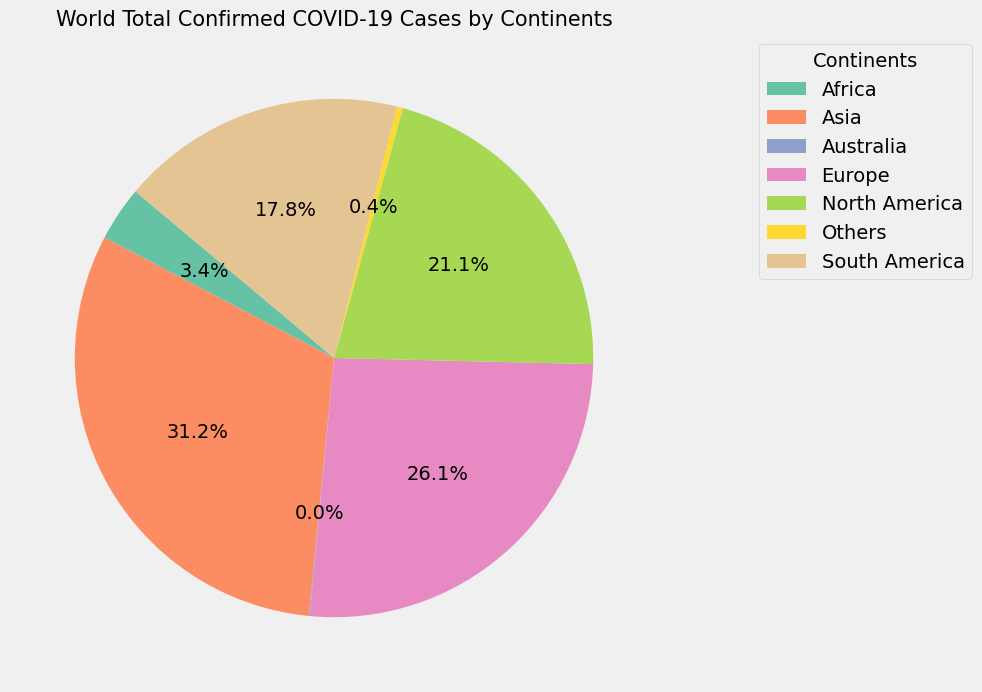

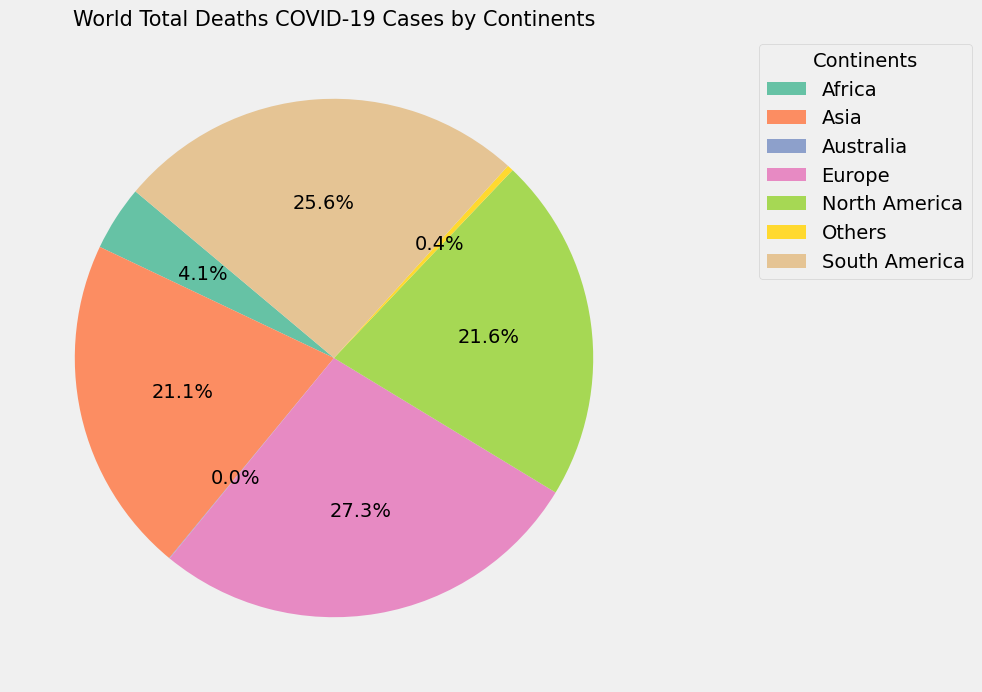

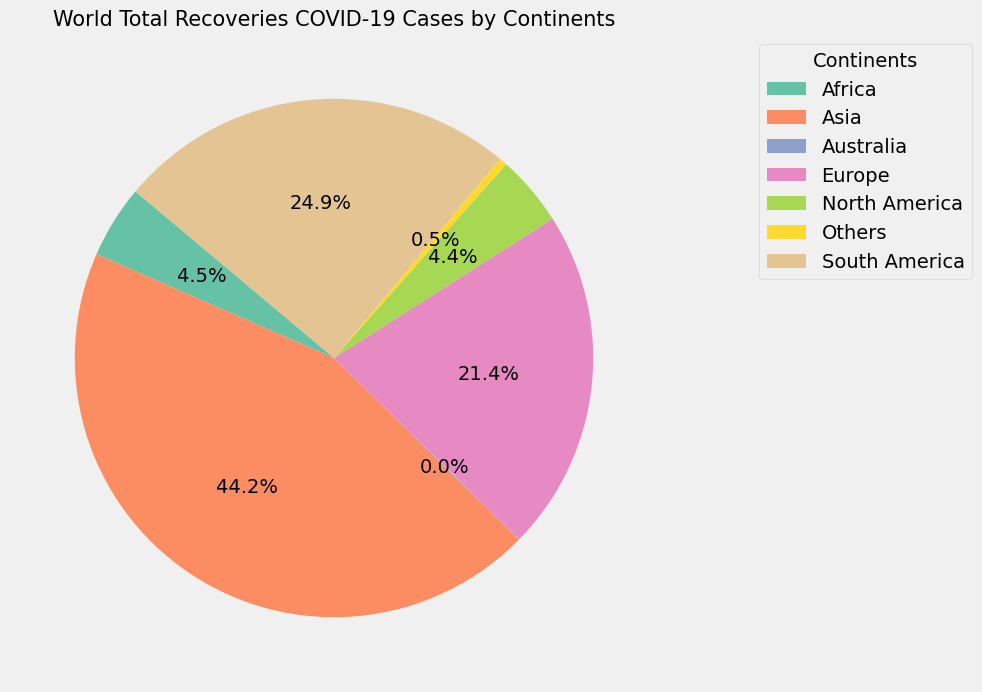

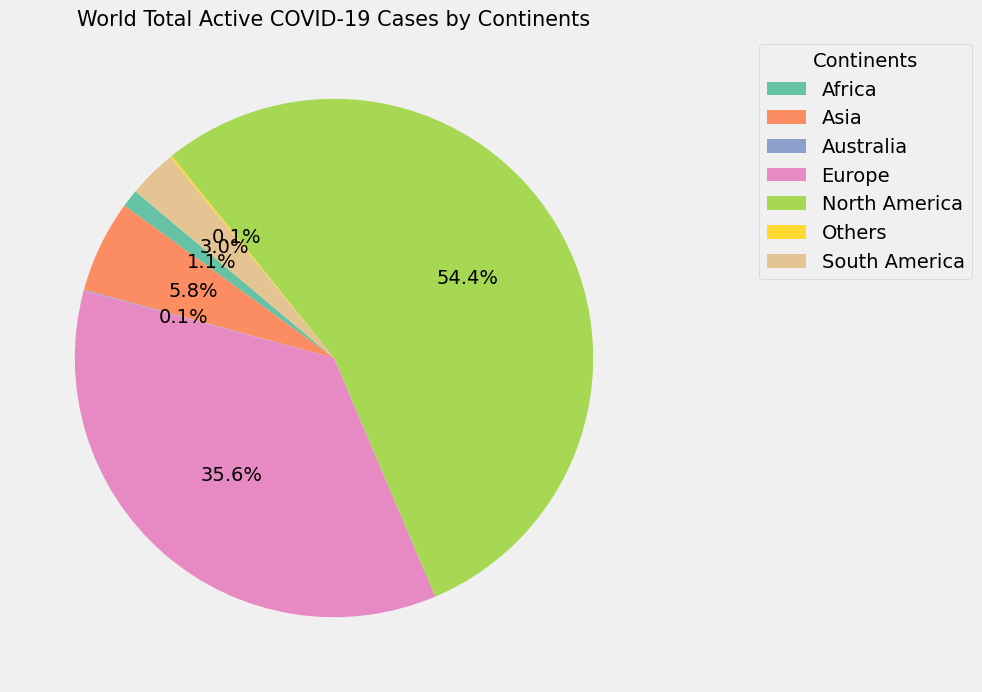

In [25]:
columns = ['Confirmed', 'Deaths', 'Recoveries', 'Active']

# Lặp qua từng cột và vẽ biểu đồ hình tròn
for i, column in enumerate(columns):
    plt.figure(figsize=(8, 8))
    
    # Vẽ biểu đồ hình tròn từ dữ liệu của tất cả các lục địa
    wedges, texts, autotexts = plt.pie(continental_df.groupby('continent')[column].sum(), autopct='%1.1f%%', startangle=140, labels=None, colors=plt.cm.Set2.colors)

    # Tạo legend tương ứng với các mảnh của biểu đồ hình tròn
    plt.legend(wedges, continental_df['continent'].unique(), title="Continents", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

    # Tạo chú thích (annotation) để hiển thị tỷ lệ trên mỗi mảnh
    for text, autotext, label in zip(texts, autotexts, continental_df['continent'].unique()):
        text.set_text('')  # Ẩn label tên nước
        autotext.set_text('{:.1%}'.format(continental_df[continental_df['continent'] == label][column].sum() / continental_df.groupby('continent')[column].sum().sum()))

    # Thiết lập tiêu đề của biểu đồ
    plt.title(f'World Total {column} COVID-19 Cases by Continents', fontsize=15)

    # Hiển thị biểu đồ
    plt.show()


# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [26]:
# Merge hai DataFrame dựa trên cột 'Country/Region'
df = pd.merge(country_df, confirmed_df[['Country/Region', 'Lat', 'Long']], on='Country/Region')
df.head()

Country/Region continent  Confirmed  Deaths  Recoveries  Active  \
0    Afghanistan      Asia     148933    6836       82586   59511   
1        Albania    Europe     133310    2457      130314     539   
2        Algeria    Africa     176724    4404      118409   53911   
3        Andorra    Europe      14797     128       14380     289   
4         Angola    Africa      43158    1026       39582    2550   

   Mortality Rate       Lat       Long  
0            4.59  33.93911  67.709953  
1            1.84  41.15330  20.168300  
2            2.49  28.03390   1.659600  
3            0.87  42.50630   1.521800  
4            2.38 -11.20270  17.873900

In [27]:
# Kiểm tra giá trị NaN trong DataFrame sau khi merge
nan_values = confirmed_df[confirmed_df[['Lat','Long']].isna().any(axis=1)]

# In ra các giá trị NaN để kiểm tra
print(nan_values)

            Province/State Country/Region      continent  Lat  Long  1/22/20  \
53  Repatriated Travellers         Canada  North America  NaN   NaN        0   
89                 Unknown          China           Asia  NaN   NaN        0   

    1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
53        0        0        0        0  ...       13       13       13   
89        0        0        0        0  ...    10222    10232    10240   

    7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
53       13       13       13      13      13      13      13  
89    10252    10275    10291   10324   10377   10414   10421  

[2 rows x 566 columns]


In [28]:
# Thêm giá trị Lat và Long cho Canada và China
df.loc[df['Country/Region'] == 'Canada', ['Lat', 'Long']] = (61.0666922, -107.991707)
df.loc[df['Country/Region'] == 'China', ['Lat', 'Long']] = (30.047992, -94.3357433)

In [29]:
m = folium.Map(location=[0, 0], zoom_start=2)

for index, row in df.iterrows():
    radius = row['Confirmed'] * 0.000002  # Điều chỉnh hằng số 0.0001 tùy thuộc vào dữ liệu của bạn
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=radius,
        popup=f"<strong>{row['Country/Region']}</strong><br>Confirmed: {row['Confirmed']}<br>Deaths: {row['Deaths']}<br>Recoveries: {row['Recoveries']}<br>Active: {row['Active']}<br>Mortality Rate: {row['Mortality Rate']}",
        color='orange',
        fill=True,
        fill_color='orange',
    ).add_to(m)
m

# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [30]:
# Tính log(10) của số lượng hoạt động
df['log_activity_count'] = df['Active'].apply(lambda x: np.log10(x))

# Tạo bản đồ với Plotly Express
fig = px.choropleth(
    df,
    locations='Country/Region',
    locationmode='country names',
    color='log_activity_count',
    color_continuous_scale='spectral',
    title='Active Cases Heat Map (log scale)',
    labels={'log_activity_count': 'Active Cases (log scale)'},
    range_color=(0, 8)  # Đặt phạm vi thang đo màu từ 0 đến 8
)

# Tùy chỉnh thang đo màu
fig.update_coloraxes(
    colorbar=dict(
        tickvals=[1, 2, 3, 4, 5, 6, 7],
        ticktext=['1', '2', '3', '4', '5', '6', '7']
    )
)

# Hiển thị bản đồ
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10628\3363091674.py:2: RuntimeWarning:

divide by zero encountered in log10

C:\Users\Admin\AppData\Local\Temp\ipykernel_10628\3363091674.py:2: RuntimeWarning:

invalid value encountered in log10



# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [48]:
# Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính
top_10_countries = country_df.nlargest(10, 'Confirmed').reset_index(drop=True)

# In ra kết quả mà không hiển thị cột đầu tiên
top_10_countries

Country/Region      continent  Confirmed  Deaths  Recoveries    Active  \
0             USA  North America   35460776  611222           0  34849554   
1           India           Asia   31812114  426290    30974748    411076   
2          Brazil  South America   20034407  559944    17771228   1703235   
3          Russia         Europe    6274006  159032     5609682    505292   
4          France         Europe    6272466  112245      415111   5745110   
5  United Kingdom         Europe    5980830  157209       24693   5798928   
6          Turkey           Asia    5822487   51767     5478185    292535   
7       Argentina  South America    4975616  106747     4615834    253035   
8        Colombia  South America    4815063  121695     4615354     78014   
9           Spain         Europe    4545184   81844      150376   4312964   

   Mortality Rate  Recovery Rate  
0            1.72       0.000000  
1            1.34       0.973678  
2            2.79       0.887035  
3            2.53       0.894115  
4            1.79       0.066180  
5            2.63       0.004129  
6            0.89       0.940867  
7            2.15       0.927691  
8            2.53       0.958524  
9            1.80       0.033085

# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

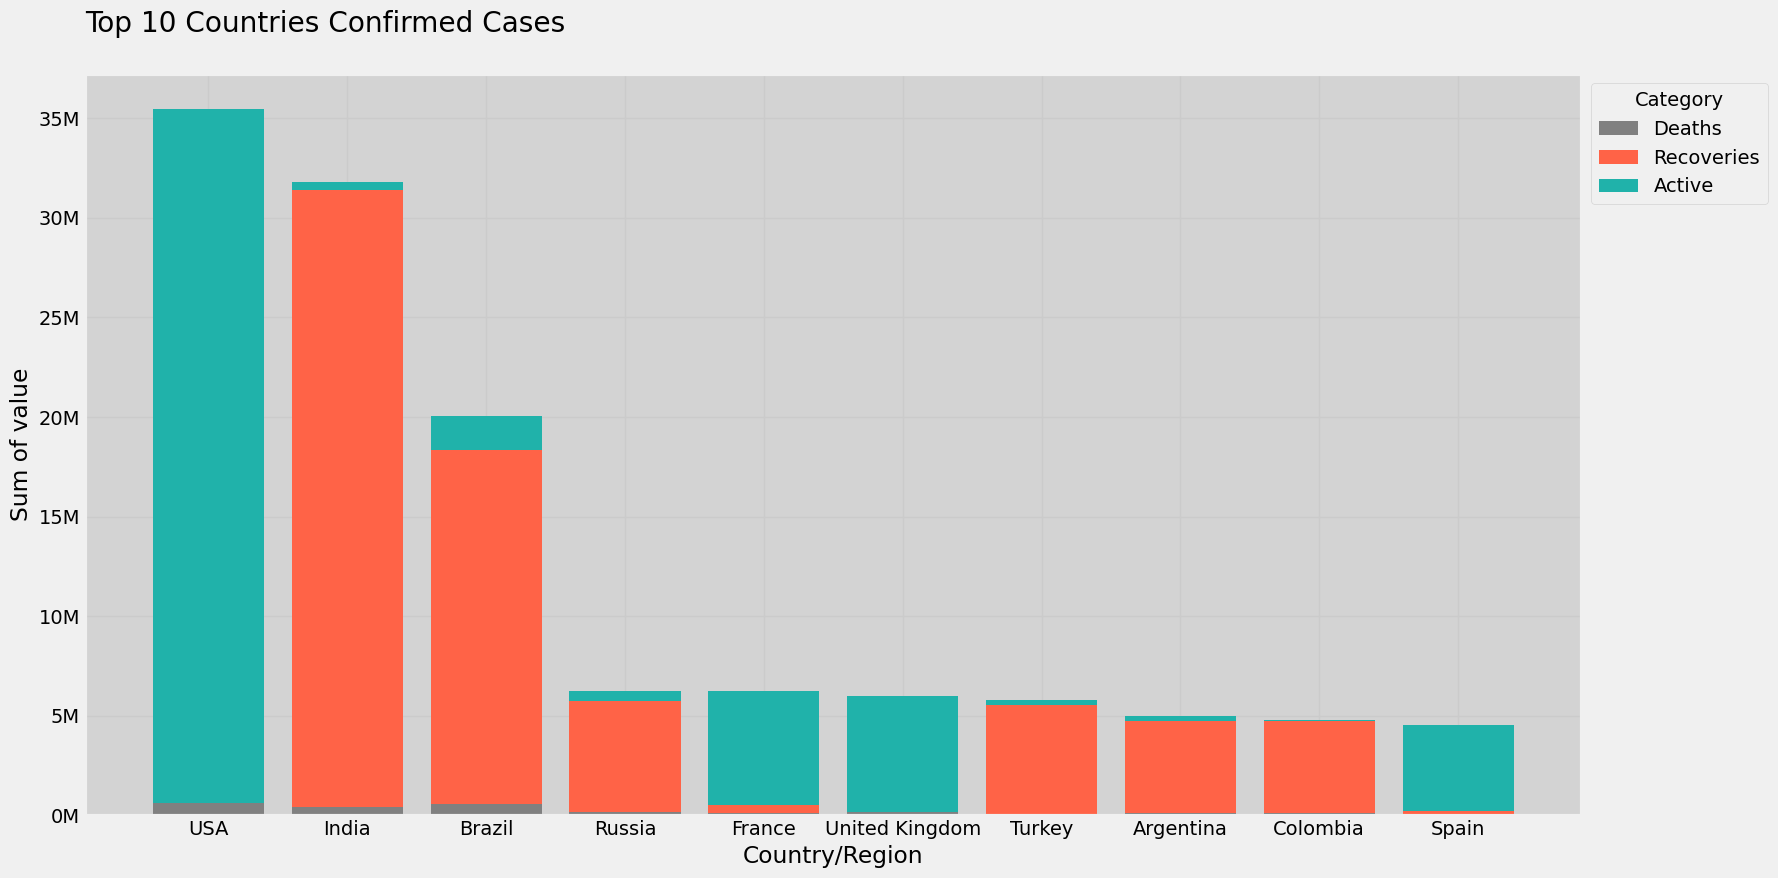

In [32]:
# Chọn các cột quan trọng
selected_columns = ['Country/Region', 'Deaths', 'Recoveries', 'Active']

# Lọc dữ liệu cho 10 quốc gia hàng đầu
top_10_countries = top_10_countries[selected_columns]

# Định nghĩa hàm để chuyển đổi giá trị trục Y sang triệu
def millions(x, pos):
    'The two args are the value and tick position'
    return '{:0.0f}M'.format(x * 1e-6)

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(18, 9))

# Vẽ biểu đồ cột chồng
bottom = np.zeros(len(top_10_countries))
bar_width = 0.8

# Tạo đối tượng Axes
ax = plt.gca()
ax.set_facecolor('lightgrey')  # Thiết lập màu nền cho Axes (phần bên trong biểu đồ)

# Vẽ cột Deaths
ax.bar(top_10_countries['Country/Region'], top_10_countries['Deaths'], bar_width, bottom=bottom, label='Deaths', color='gray')

# Cập nhật giá trị bottom
bottom += top_10_countries['Deaths']

# Vẽ cột Recoveries
ax.bar(top_10_countries['Country/Region'], top_10_countries['Recoveries'], bar_width, bottom=bottom, label='Recoveries', color='tomato')

# Cập nhật giá trị bottom
bottom += top_10_countries['Recoveries']

# Vẽ cột Active
ax.bar(top_10_countries['Country/Region'], top_10_countries['Active'], bar_width, bottom=bottom, label='Active', color='lightseagreen')

# Đặt tên cho các trục và tiêu đề biểu đồ
ax.set_xlabel('Country/Region')
ax.set_ylabel('Sum of value')
ax.set_title('Top 10 Countries Confirmed Cases', loc = 'left', pad = 30)

# Hiển thị chú thích
ax.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')

# Định dạng trục Y để hiển thị theo triệu
ax.yaxis.set_major_formatter(plt.FuncFormatter(millions))

# Hiển thị biểu đồ
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# 7. Phân tích nâng cao


# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

### Trả lời:

Dựa vào 4 biểu đồ đường ở bài toán 3 có thể kết luận dịch COVID-19 trên thế giới đã đạt đến đỉnh điểm.

# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


In [33]:
# Xác định châu lục có tỷ lệ tử vong cao nhất
continent_with_highest_mortality = continental_df.groupby('continent')['Mortality Rate'].mean().idxmax()
print(f'Châu lục có tỷ lệ tử vong cao nhất: {continent_with_highest_mortality}')

# Xác định châu lục có tỷ lệ lây lan cao nhất
continent_with_highest_spread = continental_df.groupby('continent')['Confirmed'].mean().idxmax()
print(f'Châu lục có tỷ lệ lây lan cao nhất: {continent_with_highest_spread}')

# Tính tỷ lệ khỏi bệnh
continental_df['Recovery Rate'] = continental_df['Recoveries'] / continental_df['Confirmed']
# Xác định châu lục có tỷ lệ khỏi bệnh cao nhất
continent_with_highest_recovery = continental_df.groupby('continent')['Recovery Rate'].mean().idxmax()
print(f'Châu lục có tỷ lệ khỏi bệnh cao nhất: {continent_with_highest_recovery}')

Châu lục có tỷ lệ tử vong cao nhất: South America
Châu lục có tỷ lệ lây lan cao nhất: Asia
Châu lục có tỷ lệ khỏi bệnh cao nhất: Asia


# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1 Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

In [34]:
# Xác định quốc gia có tỷ lệ tử vong cao nhất
country_with_highest_mortality = country_df.loc[country_df['Mortality Rate'].idxmax(), 'Country/Region']
print(f'20.1 Quốc gia có tỷ lệ tử vong cao nhất: {country_with_highest_mortality}')

# Xác định quốc gia có tỷ lệ lan truyền cao nhất
country_with_highest_spread = country_df.loc[country_df['Confirmed'].idxmax(), 'Country/Region']
print(f'20.2 Quốc gia có tỷ lệ lan truyền cao nhất: {country_with_highest_spread}')

# Tính tỷ lệ khỏi bệnh và chọn quốc gia có tỷ lệ cao nhất
country_df['Recovery Rate'] = country_df['Recoveries'] / country_df['Confirmed']
country_with_highest_recovery = country_df.loc[country_df['Recovery Rate'].idxmax(), 'Country/Region']
print(f'20.3 Quốc gia có tỷ lệ khỏi bệnh cao nhất: {country_with_highest_recovery}')

20.1 Quốc gia có tỷ lệ tử vong cao nhất: Vanuatu
20.2 Quốc gia có tỷ lệ lan truyền cao nhất: USA
20.3 Quốc gia có tỷ lệ khỏi bệnh cao nhất: Holy See


# Bài toán 21
**Tập dữ liệu USA**

In [35]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [36]:
us_medical_data

Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-07-07 04:34:13  32.3182   
1                     Alaska             US  2020-07-07 04:34:13  61.3707   
2             American Samoa             US  2020-07-07 04:34:13 -14.2710   
3                    Arizona             US  2020-07-07 04:34:13  33.7298   
4                   Arkansas             US  2020-07-07 04:34:13  34.9697   
5                 California             US  2020-07-07 04:34:13  36.1162   
6                   Colorado             US  2020-07-07 04:34:13  39.0598   
7                Connecticut             US  2020-07-07 04:34:13  41.5978   
8                   Delaware             US  2020-07-07 04:34:13  39.3185   
9           Diamond Princess             US  2020-07-07 04:34:13      NaN   
10      District of Columbia             US  2020-07-07 04:34:13  38.8974   
11                   Florida             US  2020-07-07 04:34:13  27.7663   
12                   Georgia             US  2020-07-07 04:34:13  33.0406   
13            Grand Princess             US  2020-07-07 04:34:13      NaN   
14                      Guam             US  2020-07-07 04:34:13  13.4443   
15                    Hawaii             US  2020-07-07 04:34:13  21.0943   
16                     Idaho             US  2020-07-07 04:34:13  44.2405   
17                  Illinois             US  2020-07-07 04:34:13  40.3495   
18                   Indiana             US  2020-07-07 04:34:13  39.8494   
19                      Iowa             US  2020-07-07 04:34:13  42.0115   
20                    Kansas             US  2020-07-07 04:34:13  38.5266   
21                  Kentucky             US  2020-07-07 04:34:13  37.6681   
22                 Louisiana             US  2020-07-07 04:34:13  31.1695   
23                     Maine             US  2020-07-07 04:34:13  44.6939   
24                  Maryland             US  2020-07-07 04:34:13  39.0639   
25             Massachusetts             US  2020-07-07 04:34:13  42.2302   
26                  Michigan             US  2020-07-07 04:34:13  43.3266   
27                 Minnesota             US  2020-07-07 04:34:13  45.6945   
28               Mississippi             US  2020-07-07 04:34:13  32.7416   
29                  Missouri             US  2020-07-07 04:34:13  38.4561   
30                   Montana             US  2020-07-07 04:34:13  46.9219   
31                  Nebraska             US  2020-07-07 04:34:13  41.1254   
32                    Nevada             US  2020-07-07 04:34:13  38.3135   
33             New Hampshire             US  2020-07-07 04:34:13  43.4525   
34                New Jersey             US  2020-07-07 04:34:13  40.2989   
35                New Mexico             US  2020-07-07 04:34:13  34.8405   
36                  New York             US  2020-07-07 04:34:13  42.1657   
37            North Carolina             US  2020-07-07 04:34:13  35.6301   
38              North Dakota             US  2020-07-07 04:34:13  47.5289   
39  Northern Mariana Islands             US  2020-07-07 04:34:13  15.0979   
40                      Ohio             US  2020-07-07 04:34:13  40.3888   
41                  Oklahoma             US  2020-07-07 04:34:13  35.5653   
42                    Oregon             US  2020-07-07 04:34:13  44.5720   
43              Pennsylvania             US  2020-07-07 04:34:13  40.5908   
44               Puerto Rico             US  2020-07-07 04:34:13  18.2208   
45              Rhode Island             US  2020-07-07 04:34:13  41.6809   
46            South Carolina             US  2020-07-07 04:34:13  33.8569   
47              South Dakota             US  2020-07-07 04:34:13  44.2998   
48                 Tennessee             US  2020-07-07 04:34:13  35.7478   
49                     Texas             US  2020-07-07 04:34:13  31.0545   
50                      Utah             US  2020-07-07 04:34:13  40.1500   
51        

Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [37]:
# Tìm tên bang có tỷ lệ tử vong cao nhất
state_with_highest_mortality = us_medical_data.loc[us_medical_data['Mortality_Rate'].idxmax(), 'Province_State']
print(f'21.1 Tiểu bang có tỷ lệ tử vong cao nhất là: {state_with_highest_mortality}')

# Chọn cột 'Confirmed' để xem xét tỷ lệ lan truyền
column_of_interest = 'Confirmed'  
# Tìm tên bang có tỷ lệ lan truyền nhiều nhất
state_with_highest_transmission = us_medical_data.loc[us_medical_data[column_of_interest].idxmax(), 'Province_State']
print(f'21.2 Tiểu bang có tỷ lệ lan truyền COVID 19 cao nhất là: {state_with_highest_transmission}')

# Tính tỷ lệ khỏi bệnh và chọn tiểu bang có tỷ lệ cao nhất
us_medical_data['Recovery_Rate'] = us_medical_data['Recovered'] / us_medical_data['Confirmed']
state_with_highest_recovery_rate = us_medical_data.loc[us_medical_data['Recovery_Rate'].idxmax(), 'Province_State']
print(f'21.3 Tiểu bang có tỷ lệ khỏi bệnh cao nhất là: {state_with_highest_recovery_rate}')

21.1 Tiểu bang có tỷ lệ tử vong cao nhất là: Connecticut
21.2 Tiểu bang có tỷ lệ lan truyền COVID 19 cao nhất là: New York
21.3 Tiểu bang có tỷ lệ khỏi bệnh cao nhất là: Minnesota


# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và sử dụng dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình

Mean Squared Error: 14109403.44185829


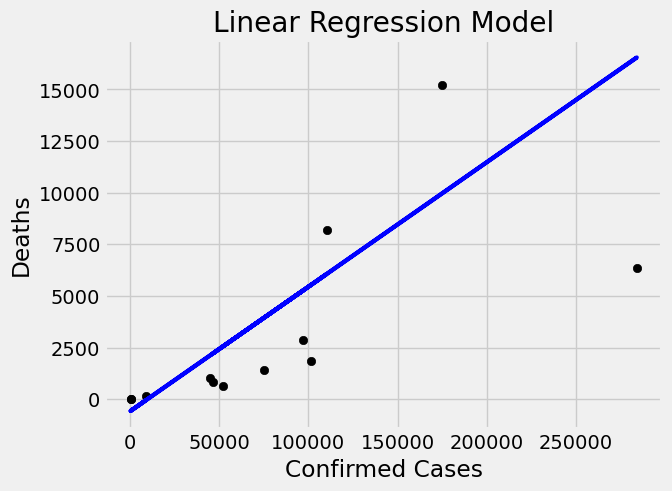

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Lọc dữ liệu cho các bang quan tâm
selected_states = ['New York', 'Florida', 'Texas', 'California']
selected_data = us_medical_data[us_medical_data['Province_State'].isin(selected_states)]

# Tạo bộ dữ liệu train và test
train_data, test_data = train_test_split(us_medical_data, test_size=0.2, random_state=42)

# Chọn các cột quan trọng
features = ['Confirmed']
target = 'Deaths'

# Xây dựng mô hình hồi quy
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Dự đoán trên bộ test
predictions = model.predict(test_data[features])

# Đánh giá mô hình
mse = mean_squared_error(test_data[target], predictions)
print(f'Mean Squared Error: {mse}')

# Trực quan hóa kết quả
plt.scatter(test_data[features], test_data[target], color='black')
plt.plot(test_data[features], predictions, color='blue', linewidth=3)
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.title('Linear Regression Model')
plt.show()
